# Vegan Restaurant Business in Toronto, Canada

## Introduction and Business Problem

For the interest of __vegetarian__, a business in terms of __restaurant__ is considered. The restaurant would be located __in Toronto__ for the convenience to its owner and its important role in Canada. This is a big city, it is definitely hard to choose __a location__ for a restaurant business. Customer behaviours will be studied in this work in order to get the insight information about which __specific area__ customers in Toronto are interested in vegetarian food. In order to be successful, understanding of demographics is a good practice to do. 

__The aims__ of this work will then attempt to answer some following questions:

1. Which area in Toronto, people are interested in a __vegetarian restaurant?__
1. How about __demographics data__, be specific for a relevant neighbourhood.
1. __A specific location__ should be answered in this work.
1. What should we __prepare__ for a new restaurant business here? What __language__ we need to prepare for our staff before running a restaurant.

Some findings would be found in the study to give relevant information to those questions.

## Who this study for?

1. __A vegetarian__ who is keen on vegetarian food to search for restaurants.
1. __An entrepreneur__ who is interested in doing a restaurant business in terms of vegetarian.
1. __Language centres and communities__ to prepare suitable courses for language training. 
1. For those who work for __hospitality industry__ as some findings in the study might be found relevant.
1. Data scientists as references.

# Data

1. Neighbourhoods in Toronto
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M (A list of postal codes of Toronto)

2. Geospatial data to get latitude and longitude of neighbourhoods
https://cocl.us/Geospatial_data (To get information about latitude and longitude of a certain code.)

3. Foursquare to get venues in a specific area. 
https://developer.foursquare.com/ (APIs to provide information about venues, specific venue photos, details and reviews from customers)

4. Toronto Demographics from Open Government Toronto
https://open.toronto.ca/dataset/wellbeing-toronto-demographics/ (Data last refreshed: Feb 28, 2017) (Demographics data in terms of population, language, age, gender)

In [ ]:
!conda install -c conda-forge geopy --yes # comment this line if the Geopy package was already installed.
!conda install -c conda-forge folium=0.5.0 --yes # comment this line if the Folium package was already installed.

Solving environment: \ 

In [200]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

# Methodology

## Data acquisition

Neighbourhoods information are acquired from <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">a list of postal codes</a>. Based on post codes, those data will be merged with latitude and longitude which are found at <a href="https://cocl.us/Geospatial_data">Geospatial data</a>.

A geocoder - Nominatim is employed in this work to fetch latitude and longitude of some specific places. Particularly, to get geo information about Toronto, Canada for showing a map.

To acquire details of areas such as venues, categories of venues, API requests were sent to Foursquare to retrieve information. Requests were repeated for all of the areas with indeed defined CLIENT_ID, CLIENT_SECRET, VERSION. Foursquare would return 100 venues data within 1 kilometre near each neighbourhood.

Demographics data will be fetched from Open Government Toronto website for analysis purpose. 



Getting data from the list of postal codes and store to a dataframe

In [3]:
link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

source = requests.get(link).text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table', class_="wikitable")

# column names for dataframe
column_names = ['Postcode', 'Borough', 'Neighborhood'] 

# init a new dataframe
df = pd.DataFrame(columns=column_names)

for row in table.findAll("tr"):
    items = row.findAll('td')
    if len(items) == 3: # to remove header row of a table
        if items[1].find(text=True) != 'Not assigned': # ignore non-assigned borough
            df = df.append({'Postcode':  items[0].find(text=True),
                            'Borough': items[1].find(text=True),
                            'Neighborhood': items[2].find(text=True)}, ignore_index=True) # append row data to the dataframe
df.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
df.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


Getting geographical coordinates accordingly to postal codes. Given geographical data at <a href="http://cocl.us/Geospatial_data">this link</a>
We can use Google Maps Geocoding API instead but Google charges for API use, or we can use Geocoder Python package <a href="https://geocoder.readthedocs.io/index.html">(link)</a>, this package however have been developed and being considered unreliable. I am therefore using data from the Geospatial data (CSV).



In [6]:
geospatial_data_df = pd.read_csv("https://cocl.us/Geospatial_data") 

geospatial_data_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


A column named "Postal Code" should be changed to "Postcode" in order to be consistent with the column in df dataframe.

In [7]:
geospatial_data_df.rename({'Postal Code': 'Postcode'}, axis=1, inplace=True)

geospatial_data_df.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging two dataframes based on their "Postcode" for data preparation.

In [8]:
merged_df = pd.merge(df, geospatial_data_df, on='Postcode')
merged_df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


## Map visualization

In [12]:
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment if you wish to install folium package

import folium

In [13]:
from geopy.geocoders import Nominatim

In [14]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [15]:
# The code was removed by Watson Studio for sharing.

Getting Toronto's lat and long values.

In [16]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent=my_email) # my_email here is used to API calling, due to security I hided by an above hidden_cell.
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


### Here we are, the map

In [17]:

# create a map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

for lat, long, borough, neighborhood in zip(merged_df['Latitude'],
                                           merged_df['Longitude'],
                                           merged_df['Borough'],
                                           merged_df['Neighborhood']):
    label = folium.Popup(str(borough) + ' borough cluster - ' + str(neighborhood), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color="green",
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Preparing a final dataframe for map visualization. I am going to draw only those boroughs contain the word "Toronto". Some boroughs are therefore ignored in this final dataframe.

In [18]:
# create new dataframe contains only the word Toronto

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# init the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
    
for lat, long, borough, neighborhood in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Borough'], merged_df['Neighborhood']):
    if 'Toronto' in borough: # to take only boroughs contain the word 'Toronto'
        neighborhoods = neighborhoods.append({'Borough':  borough,
                                          'Neighborhood': neighborhood,
                                          'Latitude': lat,
                                          'Longitude': long}, ignore_index=True)
    

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,Downtown Toronto,Queen's Park,43.667856,-79.532242
2,Downtown Toronto,Ryerson,43.657162,-79.378937
3,Downtown Toronto,Garden District,43.657162,-79.378937
4,Downtown Toronto,St. James Town,43.651494,-79.375418


In [19]:

# create a map for Toronto

map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

for lat, long, borough, neighborhood in zip(neighborhoods['Latitude'],
                                           neighborhoods['Longitude'],
                                           neighborhoods['Borough'],
                                           neighborhoods['Neighborhood']):
    label = folium.Popup(str(borough) + ' borough cluster - ' + str(neighborhood), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color="green",
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# Explore data and neighborhoods

## 1. Identify the first neighborhood and explore this neighborhood

In [20]:
first_neighborhood_name = neighborhoods.loc[0, 'Neighborhood']
first_neighborhood_lat  = neighborhoods.loc[0, 'Latitude']
first_neighborhood_long = neighborhoods.loc[0, 'Longitude']

print('Latitude and longitude values of the first neighborhood ({}) are {}, {}.'.format(first_neighborhood_name, 
                                                               first_neighborhood_lat, 
                                                               first_neighborhood_long))

Latitude and longitude values of the first neighborhood (Harbourfront) are 43.6542599, -79.3606359.


__Getting 100 top venues in The Beaches within a radius 1 kilometer.__

Defining CLIENT_ID and CLIENT_SECRET in order to use Foursquare, you cannot see my CLIENT_ID and CLIENT_SECRET because they are in my __@hidden_cell__

In [21]:
# The code was removed by Watson Studio for sharing.

In [22]:
VERSION = '20180605' # Foursquare API version

In [23]:
LIMIT = 100 # number of venues

radius = 1000 # radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    first_neighborhood_lat, 
    first_neighborhood_long, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [24]:
# function defined to extract the category from a venue
def get_category(item):
    try:
        categories = item['categories']
    except:
        categories = item['venue.categories']
        
    if len(categories) == 0:
        return None
    else:
        return categories[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']

from pandas.io.json import json_normalize # to tranform JSON file into a pandas dataframe
nearby_venues = json_normalize(venues) # to flatten JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filtering the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category, axis=1)

# cleaning columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues nearby The Beaches neighborhood found'.format(nearby_venues.shape[0]))


100 venues nearby The Beaches neighborhood found


## 2. Explore all neighborhoods in Toronto

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

__All venues in Toronto nearby its neighborhoods within 1 kilometer radius__

In [28]:
print(toronto_venues.shape)
print('{} uniques categories found'.format(len(toronto_venues['Venue Category'].unique())))
toronto_venues.head()

(5755, 7)
278 uniques categories found


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653191,-79.357947,Gym / Fitness Center
3,Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,Harbourfront,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [31]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering

# import k-means from clustering stage
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 2, 4, 1, 2, 4, 2, 2], dtype=int32)

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Café,Hotel,Coffee Shop,Theater,Sushi Restaurant,Ramen Restaurant,Restaurant,Bakery,Steakhouse,Pub
1,Bathurst Quay,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
2,Berczy Park,Coffee Shop,Café,Hotel,Beer Bar,Restaurant,Japanese Restaurant,Seafood Restaurant,Steakhouse,Italian Restaurant,Breakfast Spot
3,Brockton,Café,Coffee Shop,Restaurant,Bakery,Bar,Furniture / Home Store,Vegetarian / Vegan Restaurant,Tibetan Restaurant,Lounge,Theater
4,Business Reply Mail Processing Centre 969 East...,Park,Coffee Shop,Pizza Place,Brewery,Pet Store,Sushi Restaurant,Italian Restaurant,Flea Market,French Restaurant,Bistro


In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [36]:
toronto_merged = neighborhoods # neighborhoods data of boroughs which contains 'Toronto' word

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# Drop all neighborhoods which don't have return data from FourSquare.
toronto_merged = toronto_merged.dropna()
toronto_merged = toronto_merged.reset_index(drop=True)


toronto_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Harbourfront,43.654260,-79.360636,4,Coffee Shop,Theater,Café,Restaurant,Park,Pub,Italian Restaurant,Diner,Bakery,Breakfast Spot
1,Downtown Toronto,Queen's Park,43.667856,-79.532242,2,Pharmacy,Playground,Golf Course,Café,Skating Rink,Shopping Mall,Bank,Park,Bakery,Grocery Store
2,Downtown Toronto,Ryerson,43.657162,-79.378937,4,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Tea Room,Diner,Italian Restaurant,Cosmetics Shop,Fast Food Restaurant,Restaurant,Bookstore
3,Downtown Toronto,Garden District,43.657162,-79.378937,4,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Tea Room,Diner,Italian Restaurant,Cosmetics Shop,Fast Food Restaurant,Restaurant,Bookstore
4,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Hotel,Restaurant,Diner,Bakery,Italian Restaurant,Park,Gastropub,Japanese Restaurant


In [59]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], 
                                  toronto_merged['Longitude'], 
                                  toronto_merged['Neighborhood'], 
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

# Cluster 1

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,St. James Town,Coffee Shop,Café,Hotel,Restaurant,Diner,Bakery,Italian Restaurant,Park,Gastropub,Japanese Restaurant
6,Berczy Park,Coffee Shop,Café,Hotel,Beer Bar,Restaurant,Japanese Restaurant,Seafood Restaurant,Steakhouse,Italian Restaurant,Breakfast Spot
9,Adelaide,Café,Hotel,Coffee Shop,Theater,Sushi Restaurant,Ramen Restaurant,Restaurant,Bakery,Steakhouse,Pub
10,King,Café,Hotel,Coffee Shop,Theater,Sushi Restaurant,Ramen Restaurant,Restaurant,Bakery,Steakhouse,Pub
11,Richmond,Café,Hotel,Coffee Shop,Theater,Sushi Restaurant,Ramen Restaurant,Restaurant,Bakery,Steakhouse,Pub
14,Harbourfront East,Coffee Shop,Café,Hotel,Restaurant,Aquarium,Italian Restaurant,Bar,Japanese Restaurant,Park,Scenic Lookout
15,Toronto Islands,Coffee Shop,Café,Hotel,Restaurant,Aquarium,Italian Restaurant,Bar,Japanese Restaurant,Park,Scenic Lookout
16,Union Station,Coffee Shop,Café,Hotel,Restaurant,Aquarium,Italian Restaurant,Bar,Japanese Restaurant,Park,Scenic Lookout
21,Design Exchange,Coffee Shop,Hotel,Café,Italian Restaurant,Steakhouse,Gastropub,Restaurant,Bakery,Thai Restaurant,Theater
22,Toronto Dominion Centre,Coffee Shop,Hotel,Café,Italian Restaurant,Steakhouse,Gastropub,Restaurant,Bakery,Thai Restaurant,Theater


# Cluster 2

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,CN Tower,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
60,Bathurst Quay,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
61,Island airport,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
62,Harbourfront West,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
63,King and Spadina,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
64,Railway Lands,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout
65,South Niagara,Harbor / Marina,Coffee Shop,Garden,Café,Airport,Airport Lounge,Sculpture Garden,Dog Run,Tunnel,Scenic Lookout


# Cluster 3

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Queen's Park,Pharmacy,Playground,Golf Course,Café,Skating Rink,Shopping Mall,Bank,Park,Bakery,Grocery Store
5,The Beaches,Pub,Coffee Shop,Pizza Place,Japanese Restaurant,Park,Bakery,Bar,Beach,Breakfast Spot,Sandwich Place
8,Christie,Korean Restaurant,Café,Coffee Shop,Grocery Store,Cocktail Bar,Ice Cream Shop,Ethiopian Restaurant,Pizza Place,Mexican Restaurant,Diner
12,Dovercourt Village,Café,Coffee Shop,Park,Bar,Sushi Restaurant,Brewery,Gourmet Shop,Convenience Store,Gym,Portuguese Restaurant
13,Dufferin,Café,Coffee Shop,Park,Bar,Sushi Restaurant,Brewery,Gourmet Shop,Convenience Store,Gym,Portuguese Restaurant
17,Little Portugal,Café,Bar,Bakery,Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Pizza Place,Cocktail Bar,Men's Store
18,Trinity,Café,Bar,Bakery,Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Pizza Place,Cocktail Bar,Men's Store
19,The Danforth West,Greek Restaurant,Coffee Shop,Café,Pub,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Yoga Studio
20,Riverdale,Greek Restaurant,Coffee Shop,Café,Pub,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Yoga Studio
23,Brockton,Café,Coffee Shop,Restaurant,Bakery,Bar,Furniture / Home Store,Vegetarian / Vegan Restaurant,Tibetan Restaurant,Lounge,Theater


# Cluster 4

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Lawrence Park,Bookstore,College Quad,Gym / Fitness Center,College Gym,Coffee Shop,Café,Park,Trail,Yoga Studio,Eastern European Restaurant


# Cluster 5

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Harbourfront,Coffee Shop,Theater,Café,Restaurant,Park,Pub,Italian Restaurant,Diner,Bakery,Breakfast Spot
2,Ryerson,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Tea Room,Diner,Italian Restaurant,Cosmetics Shop,Fast Food Restaurant,Restaurant,Bookstore
3,Garden District,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Tea Room,Diner,Italian Restaurant,Cosmetics Shop,Fast Food Restaurant,Restaurant,Bookstore
7,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Japanese Restaurant,Ramen Restaurant,Park,Mexican Restaurant,Gastropub,Fast Food Restaurant,Tea Room
32,Roselawn,Sushi Restaurant,Pharmacy,Coffee Shop,Bank,Café,Italian Restaurant,Bakery,Japanese Restaurant,Bagel Shop,Gym Pool
33,Davisville North,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Café,Sushi Restaurant,Pharmacy,Pizza Place,Dessert Shop,Gym,Diner
34,Forest Hill North,Park,Café,Coffee Shop,Trail,Burger Joint,Liquor Store,Sushi Restaurant,Deli / Bodega,Italian Restaurant,Bank
35,Forest Hill West,Park,Café,Coffee Shop,Trail,Burger Joint,Liquor Store,Sushi Restaurant,Deli / Bodega,Italian Restaurant,Bank
38,North Toronto West,Park,Skating Rink,Sporting Goods Shop,Italian Restaurant,Coffee Shop,Diner,Mexican Restaurant,Café,Deli / Bodega,Restaurant
44,Davisville,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Pub,Gym,Indian Restaurant,Café,Dessert Shop,Gastropub


__Study cluster 3 as it quite fits with Vegan Restaurant business__

In [51]:
cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
top_vegan_restaurants = cluster_3.loc[toronto_merged['3rd Most Common Venue'] == 'Vegetarian / Vegan Restaurant', toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
top_vegan_restaurants

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Chinatown,Café,Bar,Vegetarian / Vegan Restaurant,Art Gallery,Vietnamese Restaurant,Coffee Shop,Bakery,Mexican Restaurant,Yoga Studio,Record Shop
52,Grange Park,Café,Bar,Vegetarian / Vegan Restaurant,Art Gallery,Vietnamese Restaurant,Coffee Shop,Bakery,Mexican Restaurant,Yoga Studio,Record Shop
53,Kensington Market,Café,Bar,Vegetarian / Vegan Restaurant,Art Gallery,Vietnamese Restaurant,Coffee Shop,Bakery,Mexican Restaurant,Yoga Studio,Record Shop


In [195]:
top_vegan_neighborhoods = top_vegan_restaurants.iloc[:,0]
top_vegan_neighborhoods

51            Chinatown
52          Grange Park
53    Kensington Market
Name: Neighborhood, dtype: object

__All of these neighborhood are the same interests in activities and venues, let's look at Demographics data from the Open Government Toronto__

The below code are hidden due to security (API key reading), the code intends to read data <a href="https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/335e3407-d3ca-422a-bfac-e3807cfbe0d5">from the Open Government Toronto</a> and load to a dataframe by pd.read_csv() function.

In [143]:
# The code was removed by Watson Studio for sharing.

toronto_demographics = pd.read_csv(your_file_path)

__Rename columns for fixing some mistakes in columns' names and easily accessing__

In [146]:
toronto_demographics = toronto_demographics.rename(columns={"Home Language Category": "Non-native speakers",
                                                            '   Language - Chinese': 'Chinese',
                                                            '   Language - Italian': 'Italian',
                                                            '   Language - Korean': 'Korean',
                                                            '   Language - Persian (Farsi)': 'Persian',
                                                            '   Language - Portuguese' : 'Portuguese',
                                                            '   Language - Russian': 'Russian',
                                                            '   Language - Spanish': 'Spanish',
                                                            '   Language - Tagalog': 'Tagalog',
                                                            '   Language - Tamil': 'Tamil',
                                                            '   Language - Urdu': 'Urdu'})
toronto_demographics.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Chinese,Italian,Korean,Persian,Portuguese,Russian,Spanish,Tagalog,Tamil,Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,1865,1950,2155,2550,...,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,2575,2535,2555,2620,...,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,575,580,670,675,...,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,495,520,570,665,...,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,670,720,720,725,...,90,510,55,285,80,30,670,195,60,140


__Get demographics information of areas from Kensington to Chinatown for insight information__

In [199]:
sentence = '|'.join(top_vegan_neighborhoods)
print(sentence)

target_place_data = toronto_demographics[toronto_demographics['Neighbourhood'].str.contains(sentence)]
target_place_data

Chinatown|Grange Park|Kensington Market


,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Chinese,Italian,Korean,Persian,Portuguese,Russian,Spanish,Tagalog,Tamil,Urdu
77,Kensington-Chinatown,78,1.5,18500,9125,9365,570,435,515,960,...,6070,65,180,125,340,95,325,190,15,60


__Interesting! Three neighbourhoods are identified as one in demographics data from the Open Government Toronto, that's why we can see all of them has the same record of activities and venues__

__Let's look at population information__

In [159]:
target_place_data[['Neighbourhood', 'Total Population', 'Non-native speakers']]

,Neighbourhood,Total Population,Non-native speakers
77,Kensington-Chinatown,18500,17685


__Non-native speakers: 17685/18500, almost of population in this neighbourhood speaks their languages, not English or French.__

Now get top 10 non-native languages.

In [174]:
top_non_native_langs = target_place_data[['Chinese','Italian','Korean', 'Persian', 'Portuguese', 'Russian', 'Spanish', 'Tagalog', 'Tamil', 'Urdu']]
top_non_native_langs

,Chinese,Italian,Korean,Persian,Portuguese,Russian,Spanish,Tagalog,Tamil,Urdu
77,6070,65,180,125,340,95,325,190,15,60


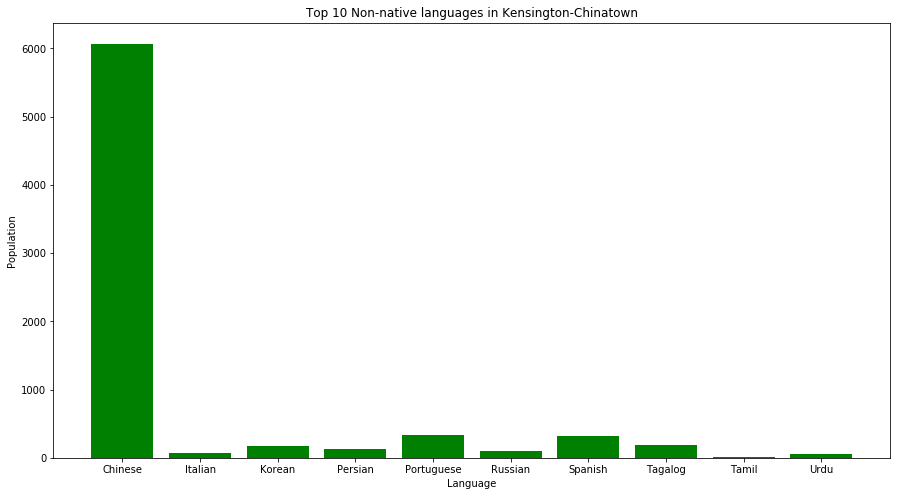

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.bar(list(top_non_native_langs.columns), top_non_native_langs.loc[77], color='green')
plt.xlabel('Language')
plt.ylabel('Population')

plt.title("Top 10 Non-native languages in Kensington-Chinatown")
plt.show()


# Results

A map below shows areas were examined in this work. Those belong to Toronto city. __A cluster numbered 3 (blue marks)__ are recognised to be fitted with the business requirement as people in __those neighbourhoods often visit vegetarian restaurant__ including The Annex, North Midtown, Yorkville, Harbord, University of Toronto, Chinatown, Grange Park, Kensington Market. In other clusters (1,2,4,5), there is not found that a vegetarian restaurant is a good option for the population there. 

<img src="https://github.com/wil-di-venezia/applied-data-science/blob/master/assets/map.png?raw=true" />

As a good business tends to attract relevant people, we would need to know top neighbourhoods people would like to visit a vegetarian restaurant. Top 3 neighbourhoods are found: Chinatown, Grange Park, Kensington Market, people in these areas have same the interests in terms of regarding their Most Common Venue. 

<img src="https://github.com/wil-di-venezia/applied-data-science/blob/master/assets/top_vegan_restaurant_venues.png?raw=true" />

According to data from Open Government Toronto, __3 top neighbourhoods found (Chinatown, Grange Park, Kensington Market) are belong to JUST one area named Kensington-Chinatown__. As the below graph, we can see __non-native speakers__ have occupied a large part of the population in this area, approximately __96%__. 

<img src="https://github.com/wil-di-venezia/applied-data-science/blob/master/assets/population.png?raw=true" />

As the below bar chart, __the Chinese language__ is recognised to be the highest bar with approximately __600 people__ speaking this language. 9 other languages are significantly low represented. 

<img src="https://github.com/wil-di-venezia/applied-data-science/blob/master/assets/languages.png?raw=true" />

# Discussion

__Kensington-Chinatown in Toronto__ should be found as a good place to set up a business restaurant in terms of __vegetarian__. Because it is the __3rd most people tend to visit__. As there are __96% of the population__ would prefer to speak their languages __(not English or French)__, businesses, therefore, should prepare themselves to be ready for languages exchange activities and training; or they can speak the language of a guest for good. __Chinese is the most powerful language in this area__ because people speaking Chinese here approximately __35%__. We would think about what we should serve in our vegan restaurants. Studying the above bar graph, the Chinese language could be represented for Chinese people here. It is therefore suggested to consider __Chinese cuisine__ for those who tend to set up vegan restaurant businesses.

For those who work for the __hospitality industry__, some relevant information could be seen here as not only for restaurant but other businesses would be suggested to concern about services to adapt with __Chinese culture__ in order to attract an appropriate targeted group of visitors.

# Conclusion 

The study has attempted to apply knowledge of __data analysis, visualisation and also machine learning__ in terms of __clustering__ based on characteristics of objects. Those are respected to __business problem-solving__ as data would be shown clearly and readability. __Data is crucial__ to explore and discover to attain correct findings. Hence, __data preparation should be conducted with integrity methods despite time-consuming task considered.__

